In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../../')
%run setup.py install
os.chdir(owd)

In [2]:
import numpy as np
import pyross
import matplotlib.pyplot as plt
from matplotlib import rc; rc('text', usetex=True)

In [3]:
M=16  ## number of age classes
my_data = np.genfromtxt('../data/age_structures/UK.csv', delimiter=',', skip_header=1)
ukM , ukF = my_data[:, 1], my_data[:, 2]
Ni = (ukM + ukF)[0:M]

# contact structure of the UK
ukCH, ukCW, ukCS, ukCO = pyross.contactMatrix.UK()
aH, aW, aS, aO = 1, 1, 1, 1
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO
 
    
beta  = 1               # the probability of infection on contact
gIa   = 1./7            # recovery rate of asymptomatic infectives 
gIs   = 1./7            # recovery rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics
parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa, 'M':M, 'Ni':Ni}

In [4]:

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK1 = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK1)

The basic reproductive ratio for these parameters is (81.75599447582681+0j)


In [5]:
aH, aW, aS, aO = 1, 0, 1, 1
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK2 = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK2)

The basic reproductive ratio for these parameters is (62.981977600135735+0j)


In [6]:
aH, aW, aS, aO = 1, 0, 0, 1
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK3 = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK3)

The basic reproductive ratio for these parameters is (43.446346534052125+0j)


In [7]:
aH, aW, aS, aO = 1, 0, 0, 0
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK4 = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK4)

The basic reproductive ratio for these parameters is (20.91298427906979+0j)


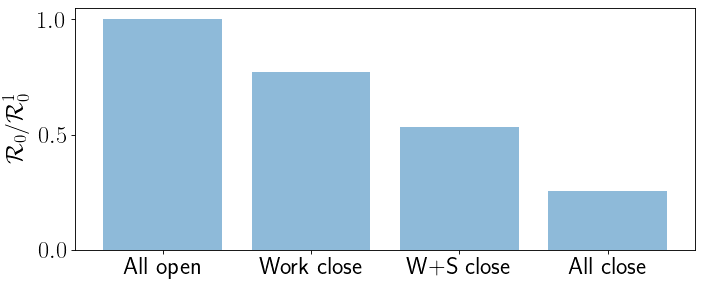

In [10]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


r0 = np.real(np.array([r0UK1, r0UK2, r0UK3, r0UK4])/r0UK1)
plt.bar(range(r0.size), r0, align='center', alpha=0.5);

labelY= ('All open', 'Work close', 'W+S close', 'All close' )
plt.xticks(range(r0.size),labelY); plt.ylabel(r'$\mathcal R_0/\mathcal R^{{1}}_0$');